### アダマールテスト

さて、一通り準備がととのったので、固有値を求める量子アルゴリズムについて解説しよう。まず、アダマールテストとよばれる以下のような量子回路（figure01.pdf）を考える。真ん中にある制御ユニタリ演算$\Lambda(U)$は、上の量子ビットが$|0\rangle$の場合にはなにもせず、$|1\rangle$の場合には$U$を作用させるユニタリ演算である。

$$
\Lambda (U) = |0\rangle \langle 0| \otimes I + |1\rangle \langle 1|  \otimes U
$$

つまり、１つ目の量子ビットが$|0\rangle$か$|1\rangle$かによって条件分岐して「なにもしない」、「$U$を作用させる」という演算が実行される。従来のコンピュータでは条件分岐は同時に実行することができないが、量子コンピュータでは重ね合わせとして、同時並列的に実行することができる。

さて、アダマールテストの説明に戻ろう。最初は簡単のために量子状態$|\psi \rangle$を
ユニタリー演算（行列）$U$の固有値$e^{i \lambda}$の固有状態（固有ベクトル）とする：
\begin{eqnarray}
U|\psi \rangle = e^{i \lambda} |\psi\rangle.
\end{eqnarray}

ステップ1までの計算で
\begin{eqnarray}
\frac{1}{\sqrt{2}} (|0\rangle  + |1\rangle) \otimes |\psi  \rangle 
\end{eqnarray}
が得られる。
ステップ２で制御$U$演算を作用させることによって、
**固有値が１つめの量子ビットの相対位相として得られる**（これは位相キックバックとしばしば呼ばれている）:
\begin{eqnarray}
&&\frac{1}{\sqrt{2}} (|0\rangle \otimes |\psi  \rangle  
+ |1\rangle \otimes U|\psi \rangle )
\\
&=&\frac{1}{\sqrt{2}} (|0\rangle \otimes |\psi  \rangle  
+e^{i \lambda} |1\rangle \otimes |\psi \rangle )
\\
&=&
\frac{1}{\sqrt{2}} (|0\rangle   
+e^{i \lambda} |1\rangle )\otimes |\psi  \rangle.
\end{eqnarray}
最後のステップ３のアダマール演算によって
\begin{eqnarray}
\left(\frac{1+e^{i\lambda}}{2}|0\rangle  
+\frac{1-e^{i\lambda}}{2} |1\rangle \right)\otimes |\psi  \rangle 
\label{eq01}
\end{eqnarray}
が得られる。
一つ目の量子ビットを測定すると測定結果$m=0,1$を得る確率は
\begin{eqnarray}
p_{m}=\left|\frac{1+(-1)^m e^{i\lambda}}{2}\right|^2 =\frac{1+(-1)^m \cos \lambda}{2}
\end{eqnarray}
となる
$|\psi \rangle$、$U$、$\langle \psi |$は
それぞれ$2^n$次元の列ベクトル、$2^n \times 2^n$行列、
$2^n$次元の行ベクトルなので、
このアダマールテストを古典コンピュータ上で愚直に計算すると
指数的に大きなメモリーの確保と演算回数が必要になる。
一方で、量子コンピューターでは、
確率分布$p_m$のもとで$m$がサンプルされる。
$\cos \lambda$を
ある誤差$\epsilon$で推定したい場合は、
その逆数$1/\epsilon$の多項式回程度サンプルすればよいことになる。

さらに、固有値が$\pm 1$の場合にはこのアダマールテストによって、固有ベクトルを得ることができる。たとえば、$U=H$の場合を考えてみよう。補助量子ビットを$|0\rangle$、アダマールテストの入力$|\psi\rangle$も$|0\rangle$とする。

In [9]:
from IPython.display import Image, display_png
from sympy import *
from sympy.physics.quantum import *
from sympy.physics.quantum.qubit import Qubit,QubitBra
init_printing() # ベクトルや行列を綺麗に表示するため


state = Qubit('00')

制御H演算は、`CGateS()`を用いて

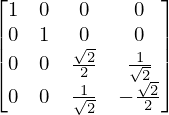

In [10]:
from sympy.physics.quantum.gate import CGateS,H
from IPython.display import Image, display_png
from sympy import *
ctrlH = CGateS(1,H(0))
represent(ctrlH,nqubits=2)

測定前の状態は、

In [13]:
H(1)*ctrlH*H(1)*state

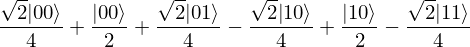

In [14]:
qapply(H(1)*ctrlH*H(1)*state)

測定は、測定用の関数が用意されており、１つめの量子ビットの測定は`measure_partial`を用いて得ることができる。`measure_partial`では測定後の状態と測定の確率がリストとして出力される。１つめの量子ビットが0だった場合の量子状態は[0][0]要素を参照すればよいので、

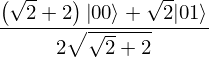

In [15]:
from sympy.physics.quantum.qubit import measure_all, measure_partial, measure_all_oneshot, measure_partial_oneshot
measured_state_zero = measure_partial(qapply(H(1)*ctrlH*H(1)*state),(1))[0][0]
simplify(measured_state_zero)

これがHの固有ベクトルであることは、２つめの量子ビットにHを作用させると（sumpyのインデックスは１つめが1、２つめが0になるよう対応させていることに注意）、

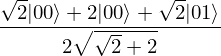

In [16]:
simplify(qapply(H(0)*measured_state_zero))

となりもとに戻る。固有状態であることがわかった。同様に1の測定結果を得た場合は、固有値-1の固有状態であることも確認できるので試してもらいたい。

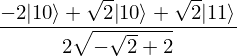

In [17]:
measured_state_one = measure_partial(qapply(H(1)*ctrlH*H(1)*state),(1,))[1][0]
simplify(qapply(H(0)*measured_state_one))

固有値が$\pm 1$ではない場合も、アダマールテストの出力を入力として繰り返すと$U$の固有状態に状態が収束していくので、興味がある人は試してもらいたい。

同じ計算を、必ずしも固有ベクトルとは限らない、一般の入力に対して行うと、測定前の状態は、
$$
 |0\rangle \frac{I+U}{2} |\psi \rangle  +  |1\rangle  \frac{I-U}{2} |\psi \rangle 
$$
となり、0もしくは1が得られる確率は、
$$
p_0 = \frac{1+ {\rm Re} \langle \psi | U | \psi \rangle }{2}
\\
p_1 = \frac{1- {\rm Re} \langle \psi | U | \psi \rangle }{2}
$$
となる。つまり、ベクトル$|\psi \rangle$でユニタリ行列Uを挟んだ値をアダマールテストのサンプル結果の推定から
計算することができる。もちろん、量子ビット数$n$が大きくなるにつれベクトルや行列の次元は指数的に大きくなるので、愚直に計算する方法は指数的な時間を要する。

さっきの$U=H$の例だと、$\langle 0 | H | 0\rangle = 1/\sqrt{2}$であるが実際、`measure_partial`で得られる確率をみてみると、

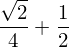

In [18]:
simplify(measure_partial(qapply(H(1)*ctrlH*H(1)*state),(1,))[0][1])

となっており、上記の議論と一致していることが確認できる。